### 9/25: Correlation

Isabella Turco  
QNC

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import scipy.stats as st

#### Parametric Correlation Coefficient

In [2]:
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

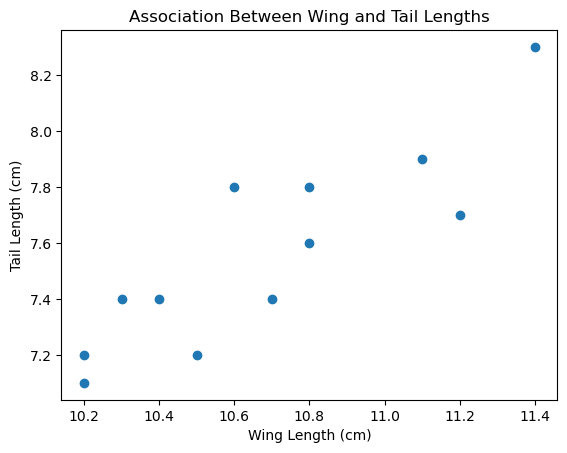

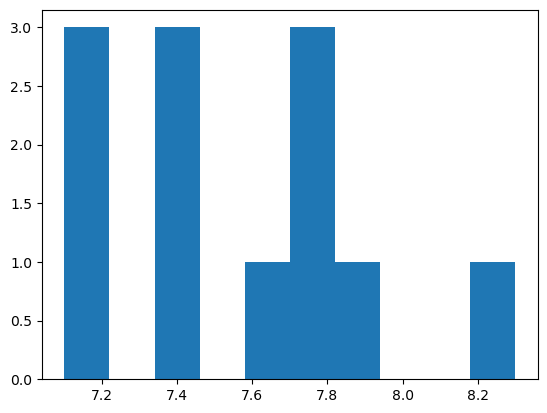

In [39]:
plt.scatter(wing_length, tail_length)
plt.xlabel("Wing Length (cm)")
plt.ylabel("Tail Length (cm)")
plt.title("Association Between Wing and Tail Lengths")
plt.show()

It seems that as wing length increases, tail length also increases.

#### Correlation Coefficient

In [32]:
# manually calculate correclation coefficient 
gns_wing, gns_tail, cov, sum_wing, sum_tail = 0, 0, 0, 0, 0

for k in range(len(wing_length)):
    gns_wing += wing_length[k]/len(wing_length)

for k in range(len(tail_length)):
    gns_tail += tail_length[k]/len(tail_length)

for k in range(len(wing_length)):
    cov += (wing_length[k]-gns_wing)*(tail_length[k]-gns_tail)/(len(wing_length))

for k in range(len(wing_length)):
    sum_wing += (wing_length[k]-gns_wing)**2

sa_wing = np.sqrt(sum_wing/len(wing_length))

for k in range(len(tail_length)):
    sum_tail += (tail_length[k]-gns_tail)**2
    
sa_tail = np.sqrt(sum_tail/len(tail_length))

corr = cov/(sa_wing*sa_tail)

print(f"Manually Calculated Correlation Coefficient: {corr}")

# use corrcoef
r_xy_np = np.corrcoef(wing_length, tail_length)[1,0]
r_yx_np = np.corrcoef(tail_length, wing_length)[1,0]
print(f"Correlation Coefficient Using numpy.corrcoef: {r_yx_np}")

Manually Calculated Correlation Coefficient: 0.8703545613058228
Correlation Coefficient Using numpy.corrcoef: 0.8703545613058227


#### Standard Error

In [33]:
n = len(wing_length)
se = math.sqrt((1-corr**2)/(n-2))
print(f"Standard Error of Correlation Coefficient: {se}")


Standard Error of Correlation Coefficient: 0.1557186365256737


#### Confidence Intervals

In [42]:
# computed from standard error? 

# fisher's z-transformation of r 
z = 0.5 * np.log((1+corr)/(1-corr))
# compute sd 
s_z = math.sqrt(1/(n-3))
# compute confidence intervals in z-space 
z_criterion = 1.96

alpha = 0.95
wing_mean = np.mean(wing_length)

t = -st.t.ppf((1-alpha)/2,df=n-1)
sem = np.std(wing_length)/np.sqrt(n);
print(f'2 : CI=[{wing_mean-sem*t:.2f}, {wing_mean+sem*t:.2f}]')

# translate each z value back to r 
r = (math.e**(2*z)-1)/(math.e**(2*z)+1)
print(r)

2 : CI=[10.44, 10.92]
0.8703545613058228


#### Non-Parametric Correlation Coefficient